In [2]:
#importing required python libraries and matplotlib for ploting the data
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [3]:
from scipy.stats.distributions import bernoulli
def throwCoin(n):
    brv = bernoulli(0.5)
    return brv.rvs(size=n)

In [6]:
randomFlips = throwCoin(10000)
runningMeans = np.zeros(10000)
sequence_lengths = np.arange(1,10001,1)
for i in sequence_lengths:
    runningMeans[i-1] = np.mean(randomFlips[:i])

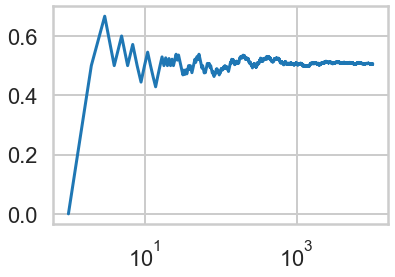

In [7]:
plt.plot(sequence_lengths, runningMeans);
plt.xscale('log')

In [8]:
def makeThrows(numberOfSamples, sampleSize):
    start=np.zeros((numberOfSamples, sampleSize), dtype=int)
    for i in range(numberOfSamples):
        start[i,:]=throwCoin(sampleSize)
    return np.mean(start, axis=1)

In [9]:
makeThrows(20, 10)

array([0.3, 0.2, 0.5, 0.5, 0.6, 0.4, 0.6, 0.6, 0.7, 0.4, 0.3, 0.5, 0.6,
       0.6, 0.5, 0.6, 0.5, 0.4, 0.8, 0.4])

In [12]:
sampleSizes=np.arange(1,1001,1)
sampleMeans = [makeThrows(200, i) for i in sampleSizes]

In [13]:
sampleMeans_mean = [np.mean(means) for means in sampleMeans]

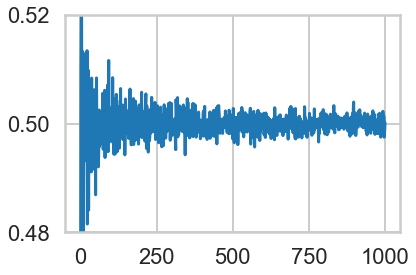

In [14]:
plt.plot(sampleSizes, sampleMeans_mean);
plt.ylim([0.480,0.520]);

In [15]:
sampleMean_10=sampleMeans[9]
sampleMean_100=sampleMeans[99]
sampleMean_1000=sampleMeans[999]

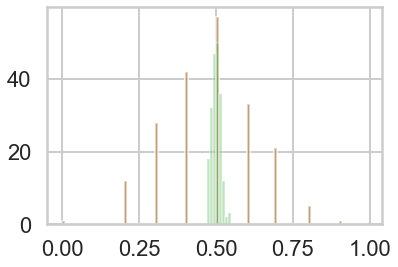

In [22]:
plt.hist(sampleMean_10, bins=np.arange(0,1,0.01), alpha=0.5);
plt.hist(sampleMean_10, bins=np.arange(0,1,0.01), alpha=0.4);
plt.hist(sampleMean_1000, bins=np.arange(0,1,0.01), alpha=0.3);

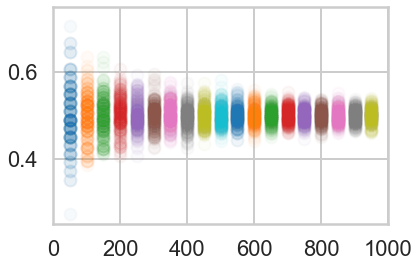

In [23]:
for i in sampleSizes:
    if i %50 ==0 and i < 1000:
        plt.scatter([i]*200, sampleMeans[i], alpha=0.03);
plt.xlim([0,1000])
plt.ylim([0.25,0.75]);

In [24]:
SD_sampleMean_1000 = [np.std(means) for means in sampleMean_1000]

c:\users\itsvi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


ValueError: x and y must have same first dimension, but have shapes (1000,) and (200,)

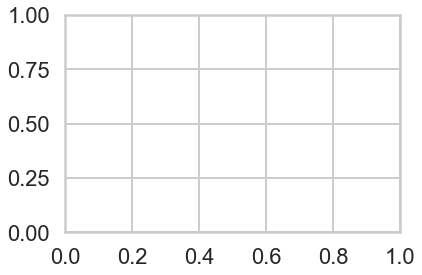

In [25]:
plt.plot(np.log10(sampleSizes), np.log10(SD_sampleMean_1000));

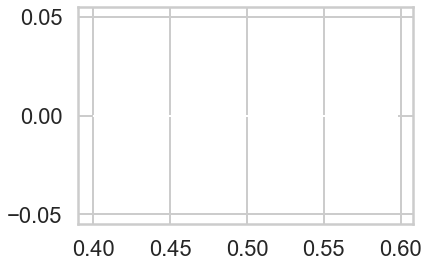

In [26]:
plt.hist(SD_sampleMean_1000, bins=np.arange(0.4,0.6,0.002));

In [29]:
#gaussian distribution
norm =  sp.stats.norm
x = np.linspace(-5,5, num=200)


fig = plt.figure(figsize=(12,6))
for mu, sigma, c in zip([0.5]*3, [0.2, 0.5, 0.8], colors):
    plt.plot(x, norm.pdf(x, mu, sigma), lw=2, 
             c=c, label = r"$\mu = {0:.1f}, \sigma={1:.1f}$".format(mu, sigma))
    plt.fill_between(x, norm.pdf(x, mu, sigma), color=c, alpha = .4)
    
    
plt.xlim([-5,5])
plt.legend(loc=0)
plt.ylabel("PDF at $x$")
plt.xlabel("$x$")

NameError: name 'colors' is not defined

<Figure size 864x432 with 0 Axes>

In [34]:
def make_throws_var(numberOfSamples, sampleSize):
    start=np.zeros((numberOfSamples, sampleSize), dtype=int)
    for i in range(numberOfSamples):
        start[i,:]=throwCoin(sampleSize)
    return np.var(start, axis=1)
sample_vars_1000_replicates = [make_throws_var(1000, sampleSize=i) for i in sampleSizes]
mean_of_sample_vars_1000 = [np.mean(vars) for vars in sample_vars_1000_replicates]
plt.plot(samplSizes, mean_of_sample_vars_1000);
plt.xscale("log");

KeyboardInterrupt: 

In [ ]:
plt.hist(sample_vars_1000_replicates[99], bins=np.arange(0.2,0.26,0.001), alpha=0.2, normed=True);

In [36]:
#gallup party affiliation poll
gallup=pd.read_csv("g12.csv").set_index('State')
gallup["Unknown"] = 100 - gallup.Democrat - gallup.Republican
gallup

,Democrat,Republican,Dem_Adv,N,Unknown
State,,,,,
Alabama,36.0,49.6,-13.6,3197,14.4
Alaska,35.9,44.3,-8.4,402,19.8
Arizona,39.8,47.3,-7.5,4325,12.9
Arkansas,41.5,40.8,0.7,2071,17.7
California,48.3,34.6,13.7,16197,17.1
Colorado,39.9,45.1,-5.2,3671,15.0
Connecticut,49.8,34.4,15.4,2020,15.8
Delaware,50.5,33.1,17.4,540,16.4
District of Columbia,79.0,12.7,66.3,416,8.3


In [38]:
gallup["SE_percentage"]=100.0*np.sqrt((gallup.Democrat/100.)*((100. - gallup.Democrat)/100.)/(gallup.N -1))
gallup.head()

,Democrat,Republican,Dem_Adv,N,Unknown,SE_percentage
State,,,,,,
Alabama,36.0,49.6,-13.6,3197,14.4,0.849059
Alaska,35.9,44.3,-8.4,402,19.8,2.395543
Arizona,39.8,47.3,-7.5,4325,12.9,0.744384
Arkansas,41.5,40.8,0.7,2071,17.7,1.082971
California,48.3,34.6,13.7,16197,17.1,0.392658


In [39]:
from scipy.special import erf
def uncertain_gallup_model(gallup):
    sigma = 3
    prob =  .5 * (1 + erf(gallup.Dem_Adv / np.sqrt(2 * sigma**2)))
    return pd.DataFrame(dict(Obama=prob), index=gallup.index)

In [45]:
predictwise = pd.read_csv("predictwise.csv")
model = uncertain_gallup_model(gallup)
model = model.join(predictwise.Votes)

In [46]:
prediction = simulate_election(model, 10000)
plot_simulation(prediction)

NameError: name 'simulate_election' is not defined